In [ ]:
# Install necessay packages (if running in colab)
!pip install pymc numpy pandas matplotlib seaborn arviz --quite


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quite


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az

In [ ]:
# Generate sythetic dataset
np.random.seed(42)
days=500 # Number of data points
temperature =np.random.normal(20,5,days) # Mean 20°C,std 5
precipitation=0.5*temperature+np.random.normal(0,2,days) # Linear relation with noise

In [ ]:
df=pd.DataFrame({'Temperature':temperature,'Precipitation':precipitation})

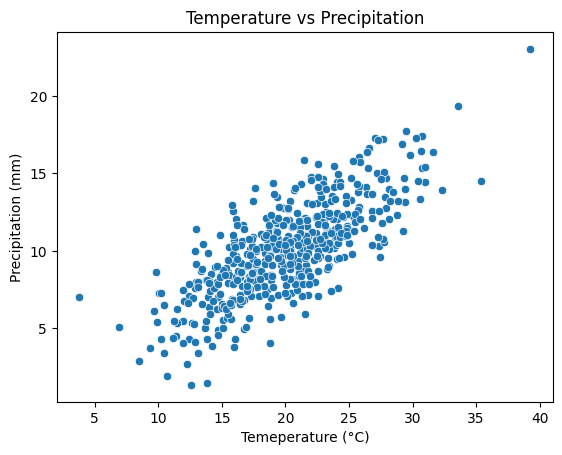

In [ ]:
# Visualize data
sns.scatterplot(x='Temperature',y='Precipitation',data=df)
plt.xlabel('Temeperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.title('Temperature vs Precipitation')
plt.show()

In [ ]:
#  Bayesian Linear Regression uising PyMC v4+
with pm.Model() as model:
  # Priors for coefficients
  alpha=pm.Normal("alpha",mu=0,sigma=10)
  beta=pm.Normal("beta",mu=0,sigma=10)
  sigma=pm.HalfNormal("sigma",sigma=1)
  # Likelihood(model equation)
  mu=alpha+beta*df['Temperature']
  y_obs=pm.Normal("y_obs",mu=mu,sigma=sigma,observed=df['Precipitation'])

  # Sampling
  trace=pm.sample(2000,return_inferencedata=True,cores=2)

Output()

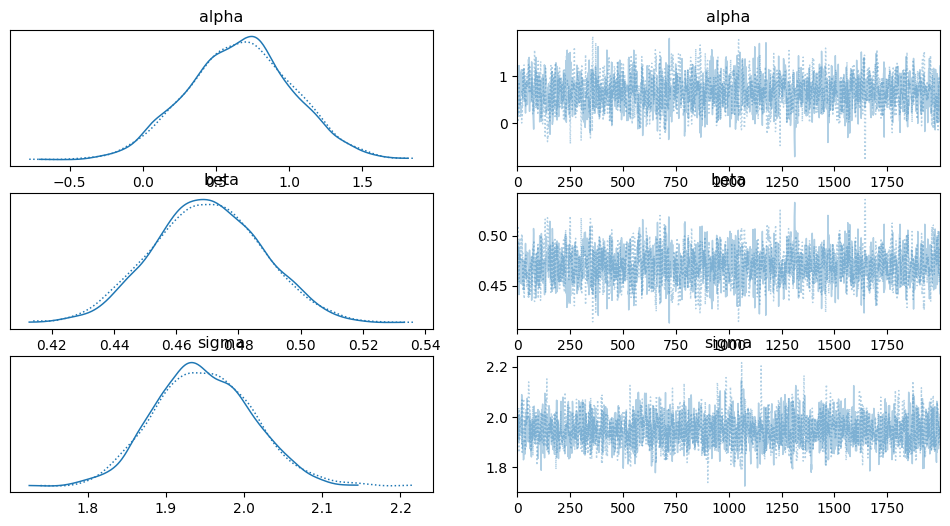

In [ ]:
# Visualizing the posterior distributions
az.plot_trace(trace,var_names=["alpha","beta","sigma"])
plt.show()

In [ ]:
# Summary of Bayersian inference
print(az.summary(trace,var_names=["alpha","beta","sigma"]))

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  0.664  0.364  -0.014    1.341      0.011    0.007    1181.0    1157.0   
beta   0.470  0.018   0.436    0.501      0.001    0.000    1139.0    1159.0   
sigma  1.949  0.062   1.837    2.065      0.001    0.001    2097.0    1775.0   

       r_hat  
alpha    1.0  
beta     1.0  
sigma    1.0  


In [ ]:
# FIXED: Sample posterior correctly
with model:
  posterior_predictive=pm.sample_posterior_predictive(trace) # FIXED:No 'draws' arguement needed
  pred_mean=posterior_predictive.posterior_predictive['y_obs'].mean(dim=["chain","draw"]).values #FIXED

Output()

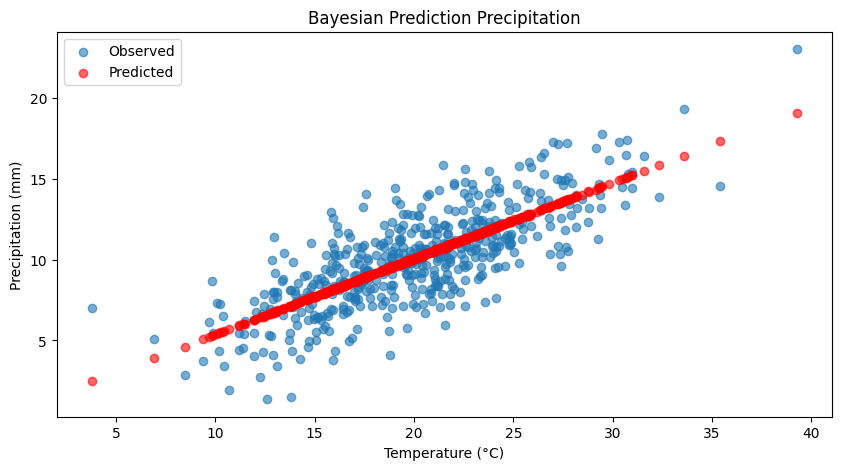

In [ ]:
# Plot observed vs predicted precipitation
plt.figure(figsize=(10,5))
plt.scatter(df['Temperature'],df['Precipitation'],label='Observed',alpha=0.6)
plt.scatter(df['Temperature'],pred_mean,label="Predicted",alpha=0.6,color='red')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.title("Bayesian Prediction Precipitation")
plt.legend()
plt.show()